<a href="https://colab.research.google.com/github/vigeecarolina/Proyectoclasificacion_imagenes_CIFAR10_DL_tecnicasavanzadas/blob/https%2Fcolab.research.google.com%2Fdrive%2F1tar5LJfTbEtB87W6UGDXAN7KuS55GugR/TP2/cnn_cifar10_V9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Connectar a Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Librerias

In [ ]:
from keras.backend_config import tf
from tensorflow import keras as ks
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Model
from keras.models import Sequential, load_model
from tensorflow.keras.optimizers import *

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model



# Variables de entorno


In [ ]:
ANCHO_IMAGEN = 32
ALTURA_IMAGEN=32
IMAGE_SIZE = (ANCHO_IMAGEN, ALTURA_IMAGEN)
CANALES_IMAGENES = 3

#ruta_archivos = '/content/drive/MyDrive/DL/data_dog_cats/'

In [ ]:
cifar10 = ks.datasets.cifar10

(x_train_img, y_train_img), (x_test_img, y_test_img) = cifar10.load_data()

x_train_scaled = x_train_img / 255.
x_test_scaled = x_test_img / 255.

170498071/170498071 [==============================] - 3s 0us/step


# Cargaremos datos en NPZ


In [ ]:
print("Etiquetas de train:", y_train_img)


# Convertir los datos en arrays de una dimension (vectores) es una buena mejora en el dataset
y_train_img = y_train_img.ravel()
y_test_img = y_test_img.ravel()


print("Etiquetas de train (en vector):", y_train_img)

Etiquetas de train: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
Etiquetas de train (en vector): [6 9 9 ... 9 1 1]


In [ ]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck'
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Train: X=(50000, 32, 32, 3), y=(50000,)
Test: X=(10000, 32, 32, 3), y=(10000,)


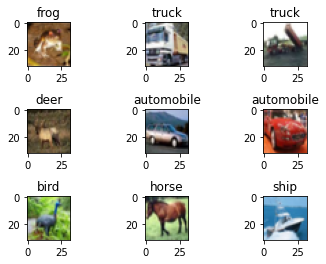

In [ ]:
# Pintemos una muestra de las las imagenes del dataset MNIST

print('Train: X=%s, y=%s' % (x_train_img.shape, y_train_img.shape))
print('Test: X=%s, y=%s' % (x_test_img.shape, y_test_img.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train_img[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_img[i]])

plt.subplots_adjust(hspace = 1)
plt.show()

In [ ]:
y_train_img

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:


x_val_scaled = x_train_scaled[-10000:]
y_val_img = y_train_img[-10000:]

x_train_scaled = x_train_scaled[:-10000]
y_train_img = y_train_img[:-10000]

In [ ]:
y_train_img

array([6, 9, 9, ..., 6, 2, 8], dtype=uint8)

In [ ]:
# Validamos el resultado
print('Train: X=%s, y=%s' % (x_train_scaled.shape, y_train_img.shape))
print('Test: X=%s, y=%s' % (x_test_scaled.shape, y_test_img.shape))
print('Validation: X=%s, y=%s' % (x_val_scaled.shape, y_val_img.shape))

Train: X=(40000, 32, 32, 3), y=(40000,)
Test: X=(10000, 32, 32, 3), y=(10000,)
Validation: X=(10000, 32, 32, 3), y=(10000,)


In [ ]:
# creating data aguementaion object with required arguments
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.2,1.0],
    zoom_range=[0.5,1.0],
    featurewise_center=True,
    featurewise_std_normalization=True)

# Montamos la Red Neuronal

## Cargar la parte de extraccion de features de VGG16

In [ ]:
base_model = ks.applications.DenseNet121(include_top=False,
                                        weights='imagenet',
                                        input_tensor=upscale,
                                        input_shape=(160,160,3),
                                        pooling='max')

NameError: ignored

In [ ]:
# Veamos como va lo de "congelar" capas de entrenamiento
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
output = model_vgg16.layers [-1].output
layer_flatten = ks.layers.Flatten()(output)
model_vgg16_final = Model(model_vgg16.input, layer_flatten)

In [ ]:
model_vgg16_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model_vgg16_final.trainable

True

## Pre-procesaremos las imagenes originales, pasandolas por VGG16, para poder usarlas en la parte de clasificacion

In [ ]:
# Llevamos las imagenes desde su origen al cuello de botella de VGG16, justo después del Flatten()

In [ ]:
def llevaracuellodebotella(x, model): #Es como hacer un PCA
  return model.predict(x)

In [ ]:
x_train_postvgg16 = llevaracuellodebotella (x_train_scaled, model_vgg16_final)

1250/1250 [==============================] - 16s 7ms/step


In [ ]:
x_test_postvgg16 = llevaracuellodebotella (x_test_scaled, model_vgg16_final)
x_val_postvgg16 = llevaracuellodebotella (x_val_scaled, model_vgg16_final)

313/313 [==============================] - 2s 6ms/step


# Montemos la red de clasificación

In [ ]:
# Definamos el output de salida de la transformacion VGG16


output_from_vgg16 = 0 #TODO

In [ ]:
model_vgg16_final.layers[-1].output

<KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'flatten')>

In [ ]:
model_con_vgg = ks.Sequential()
model_con_vgg.add(model_vgg16_final)
model_con_vgg.add(ks.layers.Dense(512, activation='relu', input_shape=(8192,)))
model_con_vgg.add(ks.layers.Dropout(0.3))
model_con_vgg.add(ks.layers.Dense(512, activation='relu'))
model_con_vgg.add(ks.layers.Dropout(0.3))
model_con_vgg.add(ks.layers.Dense(1, activation='sigmoid'))

model_con_vgg.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 512)               14714688  
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 15,240,513
Trainable params: 15,240,513


# Creamos un optimizador

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
new_adam = Adam(learning_rate=0.00005)


In [ ]:
model_con_vgg.compile(loss='binary_crossentropy', optimizer=new_adam, metrics=['accuracy'])

# Early stopping!!

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=5)

# Encoding de etiquetas

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train_img)
y_train_encoded = le.transform(y_train_img)
y_val_encoded = le.transform(y_val_img)
y_test_encoded = le.transform(y_test_img)

In [ ]:
print(np.array(y_train_img))
print(np.array(y_train_encoded))

y_train_encoded

[6 9 9 ... 6 2 8]
[6 9 9 ... 6 2 8]


array([6, 9, 9, ..., 6, 2, 8])

# Entrenar

In [ ]:
history = model_con_vgg.fit(x=x_train_scaled, y=y_train_encoded, batch_size=32,
                             epochs=30, callbacks=[callback],
                             validation_data=(x_val_scaled, y_val_encoded))

Epoch 1/30
1250/1250 [==============================] - 44s 29ms/step - loss: nan - accuracy: 0.1001 - val_loss: nan - val_accuracy: 0.1014
Epoch 2/30
1250/1250 [==============================] - 36s 29ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
Epoch 3/30
1250/1250 [==============================] - 36s 29ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
Epoch 4/30
1250/1250 [==============================] - 36s 29ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
Epoch 5/30
1250/1250 [==============================] - 36s 29ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014


# Guardamos el modelo

Aquí tenemos que guardar el modelo simple, pero tambien hemos de guardar, o bien el modelo de preproceso o bien los datos de test procesados en NPZ...

In [ ]:
# Modelo post VGG16
model_post_vgg.save(ruta_archivos+'model_with_basic_transfer_learning_post_vgg16.h5')

# Datos procesados de test
np.savez_compressed(ruta_archivos+'post_vgg16_test_data.npz', x=x_test_postvgg16, y=y_test_encoded)


# Miremos que tal rinde el modelo en errores y accuracy

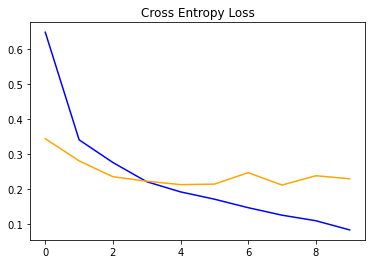

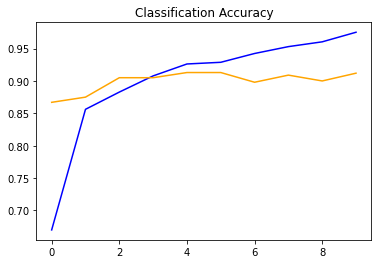

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()

In [ ]:
_, acc = model_post_vgg.evaluate(x_test_postvgg16, y_test_encoded, verbose=0)
print('Modelo con Basic Transfer Learning > %.3f' % (acc * 100.0))


Modelo con Basic Transfer Learning > 90.900
